In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

/home/yqw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.8.0


In [2]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [3]:
# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [4]:
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features

Training set: (404, 13)
Testing set:  (102, 13)


In [5]:
print(train_data[0]) 

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [6]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [7]:
print(train_labels[0:10]) 

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


In [8]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0])  # First training sample, normalized

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


In [9]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.+', end='')

EPOCHS = 500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+
.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+
.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+
.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+
.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.

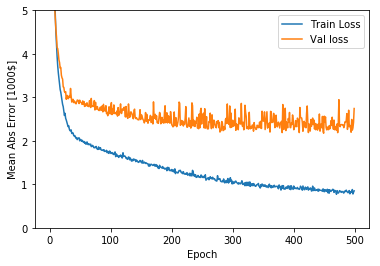

In [12]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,5])

plot_history(history)

Train on 404 samples, validate on 102 samples
Epoch 1/500
404/404 [==============================] - 0s 240us/step - loss: 551.1561 - mean_absolute_error: 21.6632 - val_loss: 542.5230 - val_mean_absolute_error: 21.5683
Epoch 2/500
404/404 [==============================] - 0s 24us/step - loss: 482.9700 - mean_absolute_error: 20.1289 - val_loss: 464.9955 - val_mean_absolute_error: 19.8112
Epoch 3/500
404/404 [==============================] - 0s 22us/step - loss: 400.4192 - mean_absolute_error: 18.1478 - val_loss: 369.8433 - val_mean_absolute_error: 17.4043
Epoch 4/500
404/404 [==============================] - 0s 21us/step - loss: 304.3148 - mean_absolute_error: 15.4744 - val_loss: 265.5723 - val_mean_absolute_error: 14.3917
Epoch 5/500
404/404 [==============================] - 0s 23us/step - loss: 206.6449 - mean_absolute_error: 12.2872 - val_loss: 170.1523 - val_mean_absolute_error: 11.2370
Epoch 6/500
404/404 [==============================] - 0s 23us/step - loss: 128.4016 - mean_a

404/404 [==============================] - 0s 22us/step - loss: 8.3846 - mean_absolute_error: 2.0603 - val_loss: 23.7667 - val_mean_absolute_error: 3.1146
Epoch 50/500
404/404 [==============================] - 0s 23us/step - loss: 8.4212 - mean_absolute_error: 2.0587 - val_loss: 22.7446 - val_mean_absolute_error: 3.0377
Epoch 51/500
404/404 [==============================] - 0s 22us/step - loss: 8.5197 - mean_absolute_error: 2.0654 - val_loss: 22.2886 - val_mean_absolute_error: 2.9759
Epoch 52/500
404/404 [==============================] - 0s 24us/step - loss: 8.2053 - mean_absolute_error: 2.0404 - val_loss: 21.4398 - val_mean_absolute_error: 2.9603
Epoch 53/500
404/404 [==============================] - 0s 25us/step - loss: 8.2667 - mean_absolute_error: 2.0243 - val_loss: 20.9410 - val_mean_absolute_error: 2.9154
Epoch 54/500
404/404 [==============================] - 0s 22us/step - loss: 8.1502 - mean_absolute_error: 2.0009 - val_loss: 22.0676 - val_mean_absolute_error: 3.0549
Epoch

Epoch 98/500
404/404 [==============================] - 0s 23us/step - loss: 6.1405 - mean_absolute_error: 1.7432 - val_loss: 18.7589 - val_mean_absolute_error: 2.6742
Epoch 99/500
404/404 [==============================] - 0s 22us/step - loss: 6.2230 - mean_absolute_error: 1.7334 - val_loss: 18.4064 - val_mean_absolute_error: 2.6973
Epoch 100/500
404/404 [==============================] - 0s 21us/step - loss: 6.0744 - mean_absolute_error: 1.7477 - val_loss: 19.3831 - val_mean_absolute_error: 2.9243
Epoch 101/500
404/404 [==============================] - 0s 22us/step - loss: 6.1683 - mean_absolute_error: 1.7309 - val_loss: 20.8418 - val_mean_absolute_error: 2.8678
Epoch 102/500
404/404 [==============================] - 0s 23us/step - loss: 6.0347 - mean_absolute_error: 1.7190 - val_loss: 19.1328 - val_mean_absolute_error: 2.8127
Epoch 103/500
404/404 [==============================] - 0s 21us/step - loss: 6.1272 - mean_absolute_error: 1.7197 - val_loss: 19.5429 - val_mean_absolute_er

404/404 [==============================] - 0s 22us/step - loss: 4.8066 - mean_absolute_error: 1.5254 - val_loss: 17.1295 - val_mean_absolute_error: 2.6859
Epoch 147/500
404/404 [==============================] - 0s 22us/step - loss: 4.7882 - mean_absolute_error: 1.5314 - val_loss: 16.8885 - val_mean_absolute_error: 2.6031
Epoch 148/500
404/404 [==============================] - 0s 24us/step - loss: 4.7001 - mean_absolute_error: 1.5091 - val_loss: 17.7064 - val_mean_absolute_error: 2.6442
Epoch 149/500
404/404 [==============================] - 0s 23us/step - loss: 4.8000 - mean_absolute_error: 1.5566 - val_loss: 17.2853 - val_mean_absolute_error: 2.6027
Epoch 150/500
404/404 [==============================] - 0s 22us/step - loss: 4.6545 - mean_absolute_error: 1.4824 - val_loss: 17.7692 - val_mean_absolute_error: 2.7040
Epoch 151/500
404/404 [==============================] - 0s 22us/step - loss: 4.9488 - mean_absolute_error: 1.5676 - val_loss: 15.9508 - val_mean_absolute_error: 2.5479


404/404 [==============================] - 0s 21us/step - loss: 3.9759 - mean_absolute_error: 1.4010 - val_loss: 17.1347 - val_mean_absolute_error: 2.6975
Epoch 195/500
404/404 [==============================] - 0s 22us/step - loss: 3.9012 - mean_absolute_error: 1.3836 - val_loss: 15.6700 - val_mean_absolute_error: 2.5700
Epoch 196/500
404/404 [==============================] - 0s 21us/step - loss: 3.7106 - mean_absolute_error: 1.3657 - val_loss: 15.9873 - val_mean_absolute_error: 2.5875
Epoch 197/500
404/404 [==============================] - 0s 21us/step - loss: 3.7530 - mean_absolute_error: 1.3520 - val_loss: 15.2088 - val_mean_absolute_error: 2.5408
Epoch 198/500
404/404 [==============================] - 0s 24us/step - loss: 3.7455 - mean_absolute_error: 1.3509 - val_loss: 14.8804 - val_mean_absolute_error: 2.5080
Epoch 199/500
404/404 [==============================] - 0s 22us/step - loss: 3.8733 - mean_absolute_error: 1.3772 - val_loss: 15.8650 - val_mean_absolute_error: 2.5983


404/404 [==============================] - 0s 22us/step - loss: 3.2664 - mean_absolute_error: 1.2451 - val_loss: 14.4291 - val_mean_absolute_error: 2.5244
Epoch 243/500
404/404 [==============================] - 0s 22us/step - loss: 3.0671 - mean_absolute_error: 1.2345 - val_loss: 14.4516 - val_mean_absolute_error: 2.5459
Epoch 244/500
404/404 [==============================] - 0s 23us/step - loss: 3.1329 - mean_absolute_error: 1.2710 - val_loss: 14.3447 - val_mean_absolute_error: 2.5336
Epoch 245/500
404/404 [==============================] - 0s 23us/step - loss: 3.1867 - mean_absolute_error: 1.2474 - val_loss: 15.2021 - val_mean_absolute_error: 2.5788
Epoch 246/500
404/404 [==============================] - 0s 21us/step - loss: 3.0790 - mean_absolute_error: 1.2679 - val_loss: 13.6206 - val_mean_absolute_error: 2.4524
Epoch 247/500
404/404 [==============================] - 0s 22us/step - loss: 3.0880 - mean_absolute_error: 1.2695 - val_loss: 13.6396 - val_mean_absolute_error: 2.4752


404/404 [==============================] - 0s 23us/step - loss: 2.5317 - mean_absolute_error: 1.1367 - val_loss: 13.1904 - val_mean_absolute_error: 2.5182
Epoch 291/500
404/404 [==============================] - 0s 23us/step - loss: 2.6574 - mean_absolute_error: 1.1632 - val_loss: 13.4564 - val_mean_absolute_error: 2.5169
Epoch 292/500
404/404 [==============================] - 0s 24us/step - loss: 2.4708 - mean_absolute_error: 1.1443 - val_loss: 14.1723 - val_mean_absolute_error: 2.5898
Epoch 293/500
404/404 [==============================] - 0s 23us/step - loss: 2.5857 - mean_absolute_error: 1.1662 - val_loss: 13.3652 - val_mean_absolute_error: 2.4600
Epoch 294/500
404/404 [==============================] - 0s 22us/step - loss: 2.6235 - mean_absolute_error: 1.1510 - val_loss: 13.7315 - val_mean_absolute_error: 2.5380
Epoch 295/500
404/404 [==============================] - 0s 25us/step - loss: 2.5786 - mean_absolute_error: 1.1598 - val_loss: 12.9772 - val_mean_absolute_error: 2.4772


404/404 [==============================] - 0s 24us/step - loss: 2.2639 - mean_absolute_error: 1.0847 - val_loss: 12.6620 - val_mean_absolute_error: 2.4605
Epoch 339/500
404/404 [==============================] - 0s 23us/step - loss: 2.3248 - mean_absolute_error: 1.0949 - val_loss: 12.9916 - val_mean_absolute_error: 2.4374
Epoch 340/500
404/404 [==============================] - 0s 23us/step - loss: 2.0150 - mean_absolute_error: 1.0295 - val_loss: 12.8921 - val_mean_absolute_error: 2.4709
Epoch 341/500
404/404 [==============================] - 0s 25us/step - loss: 2.2727 - mean_absolute_error: 1.0985 - val_loss: 12.5948 - val_mean_absolute_error: 2.4634
Epoch 342/500
404/404 [==============================] - 0s 21us/step - loss: 2.1020 - mean_absolute_error: 1.0735 - val_loss: 12.6288 - val_mean_absolute_error: 2.4351
Epoch 343/500
404/404 [==============================] - 0s 23us/step - loss: 2.2332 - mean_absolute_error: 1.0581 - val_loss: 13.3319 - val_mean_absolute_error: 2.4963


404/404 [==============================] - 0s 23us/step - loss: 1.9680 - mean_absolute_error: 1.0404 - val_loss: 12.9243 - val_mean_absolute_error: 2.5144
Epoch 387/500
404/404 [==============================] - 0s 23us/step - loss: 1.9670 - mean_absolute_error: 1.0181 - val_loss: 12.9063 - val_mean_absolute_error: 2.4951
Epoch 388/500
404/404 [==============================] - 0s 21us/step - loss: 1.7323 - mean_absolute_error: 0.9651 - val_loss: 13.3543 - val_mean_absolute_error: 2.5272
Epoch 389/500
404/404 [==============================] - 0s 23us/step - loss: 2.0486 - mean_absolute_error: 1.0142 - val_loss: 13.2975 - val_mean_absolute_error: 2.5726
Epoch 390/500
404/404 [==============================] - 0s 22us/step - loss: 1.8583 - mean_absolute_error: 0.9730 - val_loss: 13.0441 - val_mean_absolute_error: 2.5224
Epoch 391/500
404/404 [==============================] - 0s 21us/step - loss: 1.9647 - mean_absolute_error: 1.0306 - val_loss: 12.5995 - val_mean_absolute_error: 2.4758


404/404 [==============================] - 0s 23us/step - loss: 1.6499 - mean_absolute_error: 0.9595 - val_loss: 12.1140 - val_mean_absolute_error: 2.3840
Epoch 435/500
404/404 [==============================] - 0s 21us/step - loss: 1.9775 - mean_absolute_error: 1.0318 - val_loss: 13.4587 - val_mean_absolute_error: 2.5602
Epoch 436/500
404/404 [==============================] - 0s 21us/step - loss: 1.5675 - mean_absolute_error: 0.9075 - val_loss: 12.4271 - val_mean_absolute_error: 2.4342
Epoch 437/500
404/404 [==============================] - 0s 21us/step - loss: 1.9143 - mean_absolute_error: 0.9727 - val_loss: 12.5043 - val_mean_absolute_error: 2.4386
Epoch 438/500
404/404 [==============================] - 0s 21us/step - loss: 1.6596 - mean_absolute_error: 0.9516 - val_loss: 12.2218 - val_mean_absolute_error: 2.4242
Epoch 439/500
404/404 [==============================] - 0s 21us/step - loss: 1.6687 - mean_absolute_error: 0.9212 - val_loss: 12.3851 - val_mean_absolute_error: 2.4297


404/404 [==============================] - 0s 23us/step - loss: 1.4388 - mean_absolute_error: 0.8908 - val_loss: 11.8213 - val_mean_absolute_error: 2.4209
Epoch 483/500
404/404 [==============================] - 0s 22us/step - loss: 1.5568 - mean_absolute_error: 0.9051 - val_loss: 12.0282 - val_mean_absolute_error: 2.4166
Epoch 484/500
404/404 [==============================] - 0s 23us/step - loss: 1.6421 - mean_absolute_error: 0.9328 - val_loss: 12.1142 - val_mean_absolute_error: 2.4123
Epoch 485/500
404/404 [==============================] - 0s 21us/step - loss: 1.5365 - mean_absolute_error: 0.9101 - val_loss: 11.9618 - val_mean_absolute_error: 2.3946
Epoch 486/500
404/404 [==============================] - 0s 23us/step - loss: 1.5245 - mean_absolute_error: 0.8734 - val_loss: 11.6212 - val_mean_absolute_error: 2.3740
Epoch 487/500
404/404 [==============================] - 0s 21us/step - loss: 1.4083 - mean_absolute_error: 0.8652 - val_loss: 12.0919 - val_mean_absolute_error: 2.4257


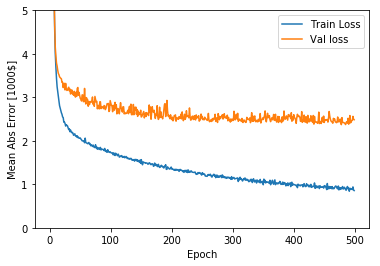

In [16]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [14]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))


Testing set Mean Abs Error: $2900.71


In [15]:
test_predictions = model.predict(test_data).flatten()

print(test_predictions)

[ 9.168009 17.78007  20.202866 33.563217 24.136528 21.245306 24.565674
 21.166246 18.350714 21.582502 20.213844 16.311842 15.151359 39.999786
 19.139297 19.209349 24.864021 17.64095  19.95042  28.107702 11.814493
 15.105692 20.212084 16.361048 18.856667 24.505695 28.606924 28.133207
 10.67442  20.155348 18.80688  15.890309 33.340946 23.57847  19.684347
  8.162563 15.343384 17.543432 20.623415 24.06818  28.813414 26.321833
 13.737385 40.72491  28.426191 25.338266 26.264431 16.949594 22.150114
 21.564138 32.60188  18.698128 10.656141 14.978191 33.449436 26.071535
 11.706863 47.1713   35.106102 22.733719 22.6996   15.662194 14.792818
 18.614151 22.162058 20.243814 13.138462 20.827839 12.77954   8.029009
 27.008677 28.0335   25.610353 14.032492 24.474709 16.95062  19.521574
 22.935688 32.801514 10.280968 20.717373 35.16425  16.717964 13.490873
 15.816332 18.440992 19.885138 19.435827 20.846836 30.391811 21.874075
 17.856531 24.212969 41.20086  34.26618  19.350767 32.748844 44.236492
 24.44